<img style="float: right;margin:0 10px 10px 0" src="screenshots/cdrc_logo.png" width=180>

#  CDRC Beginner’s Python for Data Analysis (Day 2) <a class="tocSkip">
<br>

* #### Full course materials at [francescapontin.com](http://francescapontin.com/teaching_materials.html)<a class="tocSkip">
* #### Course overview <img style="float: right;margin:0 10px 10px 0" src="screenshots/LIDA-logo.png" width=180><a class="tocSkip">
* #### Post course queries: F.L.Pontin@leeds.ac.uk <a class="tocSkip">

09.30-10.45: Spatial data visualisation Exercise 1
- Reading in spatial data
- Understanding the geometry column
- Coordinate reference systems
- Plotting maps (chloropleth, point data, categorical data & multiple map layers)

10.45-11.00: Break

11.00-12.30: Spatial data analysis Exercise 2
- Subplots
- Geometric manipulations
- Sub-setting and  aggregating spatial data
- Spatial and non-spatially joining data

12.30-13.30: Lunch break

13.30-14.45: Putting it into practice: Own data or one of two examples:
- CDRC data: House price and healthy environmental attributes
- CDRC DATA: Broadband speed and Internet usage

14.45-15.00: Break

15.00-16.30/17:00: Putting it into Practice cont.

# CDRC Data

In [1]:
#Import the required packages
import pysal
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

/opt/anaconda3/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/opt/anaconda3/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql




## Option 1: 

It is possible that broadband speed affects usership classification: the faster your broadband the more likely you are to use it. You will investigate this using the Internet user classification (IUC), a bespoke classification that describes how people living in different parts of Great Britain interact with the Internet alongside broadband speed data from Ofcom. 

### Where to find the data:
https://data.cdrc.ac.uk/geodata-packs

- Internet User Classification (IUC) : West Yorkshire (or region of Choice)
- Broadband-speed : West Yorkshire (or region of Choice)


1. Download the data
2. Save the data in an appropriate file path

Meta data:

ICU: aggregate population profiles of Internet use and engagement at the Lower Super Output Area (LSOA). [Full metadata](https://data.cdrc.ac.uk/system/files/iuc2018userguide.pdf)

Broadband speed:the average fixed-line broadband speed by output area, based on 2016, 2017 and 2018 data released by Ofcom at the Lower Super Output Area (LSOA). [Full metadata](https://data.cdrc.ac.uk/dataset/broadband-speed)







## Option 2: House price and AHAH

Have a look at house price where you live and see if this varies in line with environmental features of that area. 
The data available to download includes Median House Prices (Quarterly) for the years 1995-2018 and the Access to Healthy Assets & Hazards (AHAH)data. The AHAH data is a multi-dimensional index developed by the CDRC for Great Britain measuring how ‘healthy’ neighbourhoods are. 

The AHAH Index includes:
- Retail environment (access to fast food outlets, pubs, off-licences, tobacconists, gambling outlets),
- Health services (access to GPs, hospitals, pharmacies, dentists, leisure services),
- Physical environment (Blue Space, Green Space - Active, Green Space - Passive), and
- Air quality (Nitrogen Dioxide, Particulate Matter 10, Sulphur Dioxide).

Presence or absence of these environmental features may influence how attractive an environment is to live in and therefore house price. These variables may also be proxy for other facotrs, e.g. air pollution may give an idea of traffic volume.


### Where to find the data:
https://data.cdrc.ac.uk/geodata-packs

- Access to Healthy Assets and Hazards AHAH : West Yorkshire (or region of Choice)
- Housing Prices : West Yorkshire (or region of Choice)


1. Download the data
2. Save the data in an appropriate file path

About the datasets:


### Census data
We will also show you how to [download census data](http://infuse.ukdataservice.ac.uk) that you can also add to your data exploration and analysis of house price or internet usage. 



## Option 1: Getting started

In [2]:
internet_shape = gpd.read_file('/Users/franpontin/Downloads/data-3/Internet_User_Classification/Combined_Authorities/E47000003/shapefiles/E47000003.shp')
internet_data =  pd.read_csv('/Users/franpontin/Downloads/data-3/Internet_User_Classification/Combined_Authorities/E47000003/tables/E47000003.csv')        

internet  = pd.merge(internet_shape, internet_data,  on='lsoa11cd',  how='left')
internet.head()

,lsoa11cd,geometry,CAUTH18NM,lsoa11nm,GRP_CD,GRP_LABEL
0,E01010568,"POLYGON ((416587.878 439226.159, 416537.879 43...",West Yorkshire,Bradford 016A,6,e-Mainstream
1,E01010569,"POLYGON ((415417.183 439125.944, 415384.994 43...",West Yorkshire,Bradford 016B,7,Passive and Uncommitted Users
2,E01010570,"POLYGON ((414616.693 438845.694, 414460.174 43...",West Yorkshire,Bradford 018A,5,e-Rational Utilitarians
3,E01010571,"POLYGON ((415762.869 438492.562, 415730.593 43...",West Yorkshire,Bradford 016C,6,e-Mainstream
4,E01010572,"POLYGON ((415579.749 439223.166, 415664.902 43...",West Yorkshire,Bradford 016D,8,Digital Seniors


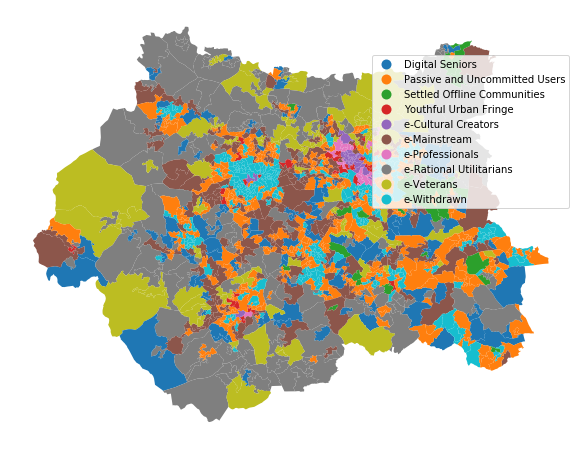

In [3]:
f,ax = plt.subplots(1, figsize=(16,8))

internet.plot('GRP_LABEL', categorical=True, legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))

plt.show()

In [4]:
broadband_shape = gpd.read_file('/Users/franpontin/Downloads/data-4/Fixed_Broadband/Combined_Authorities/E47000003/shapefiles/E47000003.shp')
broadband_data =  pd.read_csv('/Users/franpontin/Downloads/data-4/Fixed_Broadband/Combined_Authorities/E47000003/tables/E47000003_2018.csv')        

broadband  = pd.merge(broadband_shape, broadband_data,  on='lsoa11cd',  how='left')
broadband.head()

,oa11cd_x,lsoa11cd,geometry,oa11cd_y,Median.download.speed..Mbit.s.,Average.download.speed..Mbit.s.,Minimum.download.speed..Mbit.s.,Maximum.download.speed..Mbit.s.,Average.download.speed..Mbit.s..for.lines...10Mbit.s,Average.download.speed..Mbit.s..for.lines.10.30Mbit.s,...,Number.of.premises.with.UFBB.availability,Number.of.premises.with.Full.Fibre.availability,Number.of.premises.unable.to.receive.2Mbit.s,Number.of.premises.unable.to.receive.5Mbit.s,Number.of.premises.unable.to.receive.10Mbit.s,Number.of.premises.unable.to.receive.30Mbit.s,Number.of.premises.below.the.USO,Number.of.premises.with.NGA,Number.of.premises.able.to.receive.decent.broadband.from.FWA,Number.of.premises.able.to.receive.SFBB.from.FWA
0,E00053353,E01010573,"POLYGON ((415817.093 440872.597, 415821.094 44...",E00053353,25.6,26.2,0.4,79.9,2.9,19.4,...,6,0,0,0,2,41,2,98,12,2
1,E00053353,E01010573,"POLYGON ((415817.093 440872.597, 415821.094 44...",E00053354,50.0,57.4,1.0,200.0,2.8,19.9,...,130,0,0,0,0,0,0,130,70,0
2,E00053353,E01010573,"POLYGON ((415817.093 440872.597, 415821.094 44...",E00053357,40.0,52.2,0.3,200.0,4.0,24.1,...,105,0,0,0,0,0,0,139,136,0
3,E00053353,E01010573,"POLYGON ((415817.093 440872.597, 415821.094 44...",E00053387,39.7,59.5,0.5,200.0,3.0,22.3,...,116,0,0,0,0,0,0,133,127,0
4,E00053353,E01010573,"POLYGON ((415817.093 440872.597, 415821.094 44...",E00053404,54.9,62.8,3.1,200.0,4.9,28.5,...,136,0,0,0,0,0,0,183,179,0


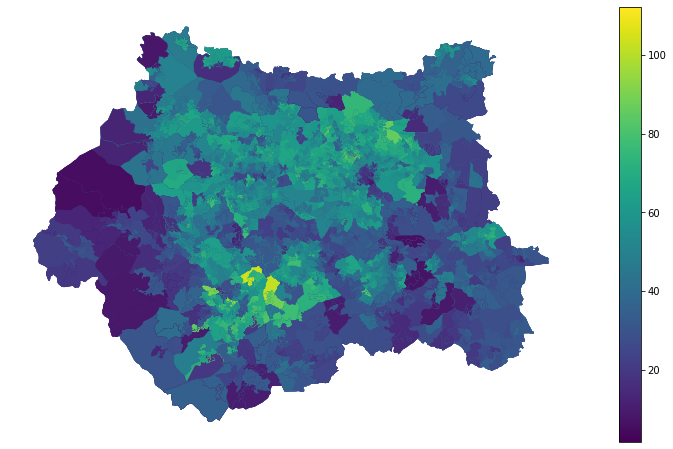

In [5]:
f,ax = plt.subplots(1, figsize=(16,8))

broadband.plot('Average.download.speed..Mbit.s.', legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

plt.show()

In [6]:
int_broad = gpd.sjoin(internet, broadband, how='left')

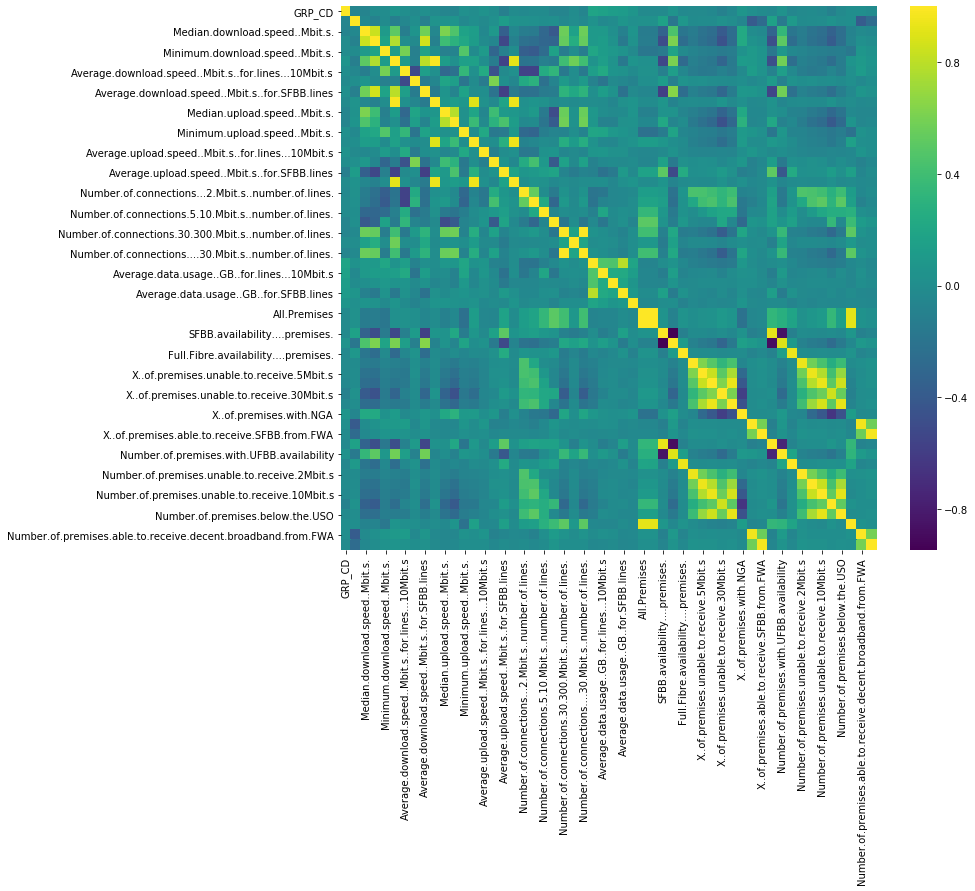

In [7]:
f,ax = plt.subplots(1, figsize=(12,10))
sns.heatmap(int_broad.corr(),cmap='viridis')
plt.show()

In [8]:
GRP_dummies =pd.get_dummies(int_broad["GRP_LABEL"], prefix='GRP')
int_broad_dummies = pd.concat([int_broad,GRP_dummies], axis=1)

In [9]:
# predict average data usage given the internet user classification

# define X and y
X = int_broad_dummies[['GRP_Digital Seniors', 'GRP_Passive and Uncommitted Users',
       'GRP_Settled Offline Communities', 'GRP_Youthful Urban Fringe',
       'GRP_e-Cultural Creators',  'GRP_e-Professionals',
       'GRP_e-Rational Utilitarians', 'GRP_e-Veterans','GRP_e-Withdrawn']] # explanatory variable
y = int_broad_dummies['Average.data.usage..GB.'] # dependent variable

# Fit the model
model = sm.OLS(y, X.astype(float)).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Average.data.usage..GB.   R-squared (uncentered):                   0.776
Model:                                 OLS   Adj. R-squared (uncentered):              0.776
Method:                      Least Squares   F-statistic:                          4.443e+04
Date:                     Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                             18:03:38   Log-Likelihood:                     -7.1717e+05
No. Observations:                   115146   AIC:                                  1.434e+06
Df Residuals:                       115137   BIC:                                  1.434e+06
Df Model:                                9                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
GRP_Digital Seniors                 218.2410      1.212    180.082      0.000     215.866     220.616
GRP_Passive and Uncommitted Users   257.0888      0.715    359.542      0.000     255.687     258.490
GRP_Settled Offline Communities     215.9137      2.555     84.507      0.000     210.906     220.921
GRP_Youthful Urban Fringe           267.7170      2.282    117.328      0.000     263.245     272.189
GRP_e-Cultural Creators             323.6496      2.345    138.035      0.000     319.054     328.245
GRP_e-Professionals                 234.0349      3.037     77.052      0.000     228.082     239.988
GRP_e-Rational Utilitarians         199.1753      1.007    197.849      0.000     197.202     201.148
GRP_e-Veterans                      212.5490      1.176    180.747      0.000     210.244     214.854
GRP_e-Withdrawn                     293.1510      0.845    347.096      0.000     291.496     294.806
==============================================================================
Omnibus:                    33226.514   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126173.322
Skew:                           1.409   Prob(JB):                         0.00
Kurtosis:                       7.285   Cond. No.                         4.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

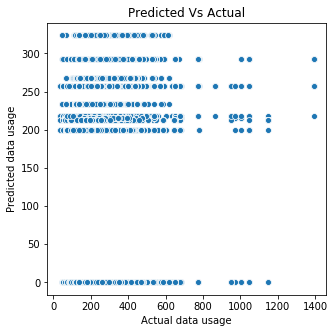

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

sns.scatterplot( int_broad_dummies['Average.data.usage..GB.'],model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual data usage')
ax.set_ylabel('Predicted data usage');

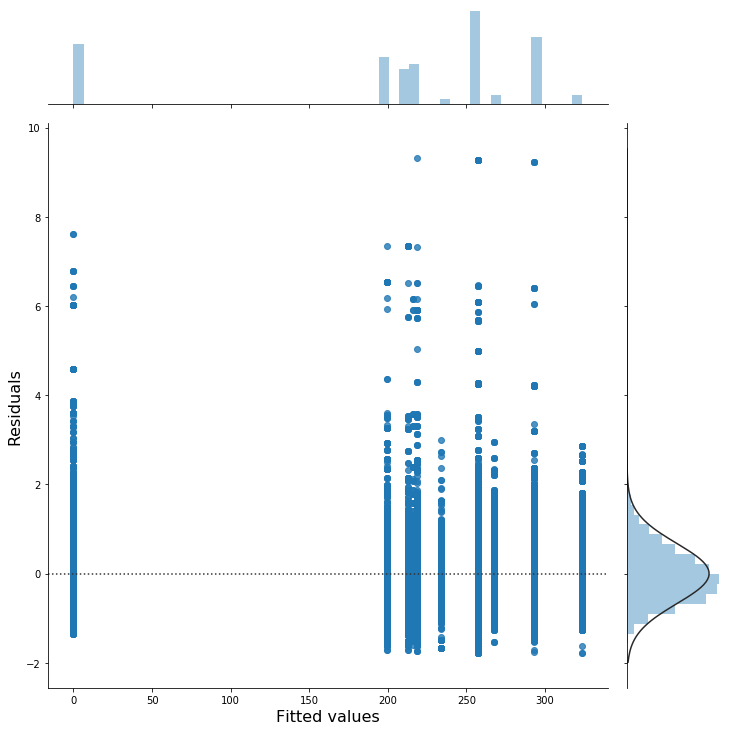

In [11]:
# Plot residuals plot

g =sns.jointplot(model.fittedvalues, model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

## Option 2: Getting started

In [12]:
# change the file path to match where you saved the data (don't keep it in your downalods like me!)
house_shape = gpd.read_file('/Users/franpontin/Downloads/data/Housing_Prices/Combined_Authorities/E47000003/shapefiles/E47000003.shp')

In [13]:
house_price =pd.read_csv('/Users/franpontin/Downloads/data/Housing_Prices/Combined_Authorities/E47000003/tables/E47000003_LR001MED.csv')

In [14]:
house_price.head()

,lsoa11cd,CAUTH18NM,lsoa11nm,median_95Q1,median_95Q2,median_95Q3,median_95Q4,median_96Q1,median_96Q2,median_96Q3,...,median_16Q3,median_16Q4,median_17Q1,median_17Q2,median_17Q3,median_17Q4,median_18Q1,median_18Q2,median_18Q3,median_18Q4
0,E01010568,West Yorkshire,Bradford 016A,57000.0,43850.0,60000.0,56000.0,45500.0,59500.0,54500.0,...,107750.0,169500.0,161250.0,200725.0,153000.0,210000.0,171500.0,180000.0,175600.0,228000.0
1,E01010569,West Yorkshire,Bradford 016B,40000.0,43000.0,43000.0,29750.0,49000.0,28500.0,82000.0,...,148500.0,116000.0,138750.0,124500.0,145000.0,168000.0,104000.0,137000.0,125000.0,150000.0
2,E01010570,West Yorkshire,Bradford 018A,101000.0,109000.0,119000.0,92000.0,112250.0,95500.0,110000.0,...,412000.0,359000.0,310000.0,361000.0,307500.0,350000.0,301000.0,307500.0,340000.0,315000.0
3,E01010571,West Yorkshire,Bradford 016C,44000.0,37475.0,50000.0,17000.0,41250.0,40250.0,34500.0,...,151750.0,147750.0,157500.0,121000.0,138750.0,158000.0,153000.0,134500.0,148750.0,150000.0
4,E01010572,West Yorkshire,Bradford 016D,58500.0,50500.0,57725.0,52750.0,50000.0,47500.0,49000.0,...,176000.0,198500.0,154975.0,189000.0,198000.0,199950.0,187975.0,156500.0,161000.0,184975.0


In [15]:
house  = pd.merge(house_shape, house_price,  on='lsoa11cd',  how='left')
house.head()

,lsoa11cd,geometry,CAUTH18NM,lsoa11nm,median_95Q1,median_95Q2,median_95Q3,median_95Q4,median_96Q1,median_96Q2,...,median_16Q3,median_16Q4,median_17Q1,median_17Q2,median_17Q3,median_17Q4,median_18Q1,median_18Q2,median_18Q3,median_18Q4
0,E01010568,"POLYGON ((415809.999 438803.797, 415814.000 43...",West Yorkshire,Bradford 016A,57000.0,43850.0,60000.0,56000.0,45500.0,59500.0,...,107750.0,169500.0,161250.0,200725.0,153000.0,210000.0,171500.0,180000.0,175600.0,228000.0
1,E01010569,"POLYGON ((414339.971 438532.871, 414341.412 43...",West Yorkshire,Bradford 016B,40000.0,43000.0,43000.0,29750.0,49000.0,28500.0,...,148500.0,116000.0,138750.0,124500.0,145000.0,168000.0,104000.0,137000.0,125000.0,150000.0
2,E01010570,"POLYGON ((414231.359 439024.660, 414237.676 43...",West Yorkshire,Bradford 018A,101000.0,109000.0,119000.0,92000.0,112250.0,95500.0,...,412000.0,359000.0,310000.0,361000.0,307500.0,350000.0,301000.0,307500.0,340000.0,315000.0
3,E01010571,"POLYGON ((415493.608 438684.597, 415494.998 43...",West Yorkshire,Bradford 016C,44000.0,37475.0,50000.0,17000.0,41250.0,40250.0,...,151750.0,147750.0,157500.0,121000.0,138750.0,158000.0,153000.0,134500.0,148750.0,150000.0
4,E01010572,"POLYGON ((415466.981 439131.016, 415465.682 43...",West Yorkshire,Bradford 016D,58500.0,50500.0,57725.0,52750.0,50000.0,47500.0,...,176000.0,198500.0,154975.0,189000.0,198000.0,199950.0,187975.0,156500.0,161000.0,184975.0


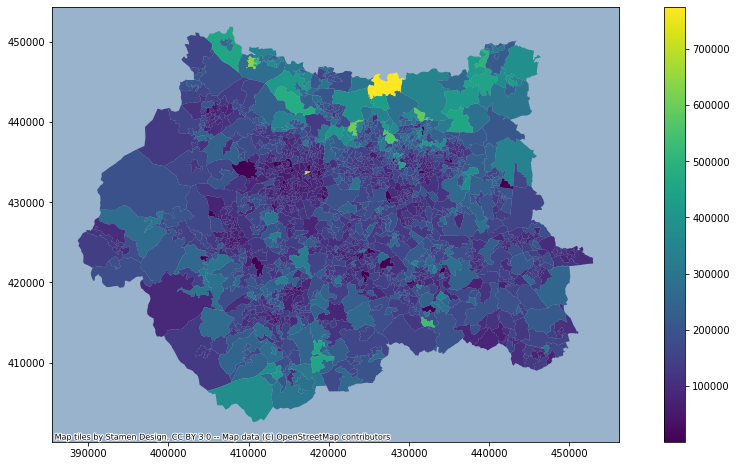

In [16]:
f,ax = plt.subplots(1, figsize=(16,8))
house.plot(column='median_18Q2',ax=ax, legend=True)
ctx.add_basemap(ax=ax)
plt.show();

In [17]:
AHAH_shape =gpd.read_file('/Users/franpontin/Downloads/data-2/Access_to_Healthy_Assets_and_Hazards_AHAH/Combined_Authorities/E47000003/shapefiles/E47000003.shp')
AHAH_data = pd.read_csv('/Users/franpontin/Downloads/data-2/Access_to_Healthy_Assets_and_Hazards_AHAH/Combined_Authorities/E47000003/tables/E47000003.csv')

AHAH = pd.merge(AHAH_shape, AHAH_data,  on='lsoa11cd',  how='left')

In [18]:
AHAH.head()

,lsoa11cd,geometry,CAUTH18NM,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,...,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
0,E01010568,"POLYGON ((415809.999 438803.797, 415814.000 43...",West Yorkshire,Bradford 016A,26204,24968,25575,18970,22.244389,20.540297,...,9,2,1,5,6,8,10,6,3,7
1,E01010569,"POLYGON ((414339.971 438532.871, 414341.412 43...",West Yorkshire,Bradford 016B,20123,24733,14741,19068,14.863754,20.230112,...,4,4,4,5,7,6,3,6,3,7
2,E01010570,"POLYGON ((414231.359 439024.660, 414237.676 43...",West Yorkshire,Bradford 018A,6803,34023,33369,14715,4.035315,37.574157,...,2,7,5,3,4,7,10,5,3,6
3,E01010571,"POLYGON ((415493.608 438684.597, 415494.998 43...",West Yorkshire,Bradford 016C,30537,18925,9414,20192,29.470202,13.652407,...,8,1,1,6,8,7,5,6,4,8
4,E01010572,"POLYGON ((415466.981 439131.016, 415465.682 43...",West Yorkshire,Bradford 016D,26087,13826,16249,18577,22.077559,9.109686,...,7,2,2,5,7,8,6,6,3,7


Check CRS

In [19]:
AHAH.crs

{'proj': 'tmerc',
 'lat_0': 49,
 'lon_0': -2,
 'k': 0.9996012717,
 'x_0': 400000,
 'y_0': -100000,
 'ellps': 'airy',
 'units': 'm',
 'no_defs': True}

Note CRS: 'tmerc' learn more here: https://proj.org/operations/projections/tmerc.html

Ensure AHAH CRS the same as the house CRS (to allow overlayed mapping) 

In [20]:
AHAH = AHAH.to_crs(house.crs)

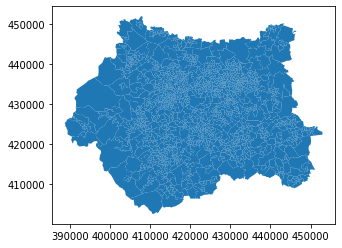

In [21]:
AHAH.plot();

In [22]:
AHAH.columns

Index(['lsoa11cd', 'geometry', 'CAUTH18NM', 'lsoa11nm', 'r_rank', 'h_rank',
       'g_rank', 'e_rank', 'r_exp', 'h_exp', 'g_exp', 'e_exp', 'ahah',
       'r_ahah', 'd_ahah', 'r_dec', 'h_dec', 'g_dec', 'e_dec', 'gpp_dist',
       'ed_dist', 'dent_dist', 'pharm_dist', 'gamb_dist', 'ffood_dist',
       'pubs_dist', 'leis_dist', 'blue_dist', 'off_dist', 'tobac_dist',
       'green_pas', 'green_act', 'ur', 'no2_mean', 'pm10_mean', 'so2_mean',
       'd_gpp_dist', 'd_ed_dist', 'd_pharm_dist', 'd_dent_dist', 'd_gamb_dist',
       'd_ffood_dist', 'd_pubs_dist', 'd_leis_dist', 'd_blue_dist',
       'd_off_dist', 'd_tobac_dist', 'd_green_pas', 'd_green_act',
       'd_no2_mean', 'd_pm10_mean', 'd_so2_mean'],
      dtype='object')

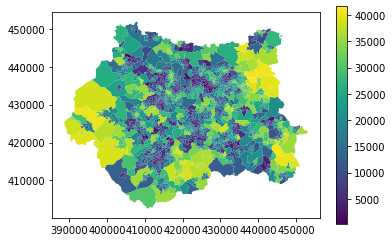

In [23]:
AHAH.plot(column='g_rank', legend =True)

Data for the AHAH index was collected in or as close to 2016 as possible. So we might only want to look at how environmental quality affects house price in 2016.

In [24]:
house_16 = house[['lsoa11cd', 'geometry', 'CAUTH18NM', 'lsoa11nm','median_16Q1',
       'median_16Q2', 'median_16Q3', 'median_16Q4']]

In [25]:
house_16.head()

,lsoa11cd,geometry,CAUTH18NM,lsoa11nm,median_16Q1,median_16Q2,median_16Q3,median_16Q4
0,E01010568,"POLYGON ((415809.999 438803.797, 415814.000 43...",West Yorkshire,Bradford 016A,141500.0,155500.0,107750.0,169500.0
1,E01010569,"POLYGON ((414339.971 438532.871, 414341.412 43...",West Yorkshire,Bradford 016B,118500.0,155000.0,148500.0,116000.0
2,E01010570,"POLYGON ((414231.359 439024.660, 414237.676 43...",West Yorkshire,Bradford 018A,330000.0,345000.0,412000.0,359000.0
3,E01010571,"POLYGON ((415493.608 438684.597, 415494.998 43...",West Yorkshire,Bradford 016C,133500.0,130000.0,151750.0,147750.0
4,E01010572,"POLYGON ((415466.981 439131.016, 415465.682 43...",West Yorkshire,Bradford 016D,147000.0,170000.0,176000.0,198500.0


In [26]:
house_16.groupby(['median_16Q2', 'median_16Q3', 'median_16Q4'])

In [27]:
house_16['mean_16'] = house_16.loc[: , ['median_16Q2', 'median_16Q3', 'median_16Q4']].mean(axis=1)
house_16.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,lsoa11cd,geometry,CAUTH18NM,lsoa11nm,median_16Q1,median_16Q2,median_16Q3,median_16Q4,mean_16
0,E01010568,"POLYGON ((415809.999 438803.797, 415814.000 43...",West Yorkshire,Bradford 016A,141500.0,155500.0,107750.0,169500.0,144250.000000
1,E01010569,"POLYGON ((414339.971 438532.871, 414341.412 43...",West Yorkshire,Bradford 016B,118500.0,155000.0,148500.0,116000.0,139833.333333
2,E01010570,"POLYGON ((414231.359 439024.660, 414237.676 43...",West Yorkshire,Bradford 018A,330000.0,345000.0,412000.0,359000.0,372000.000000
3,E01010571,"POLYGON ((415493.608 438684.597, 415494.998 43...",West Yorkshire,Bradford 016C,133500.0,130000.0,151750.0,147750.0,143166.666667
4,E01010572,"POLYGON ((415466.981 439131.016, 415465.682 43...",West Yorkshire,Bradford 016D,147000.0,170000.0,176000.0,198500.0,181500.000000


In [28]:
AHAH_house = gpd.sjoin(house_16, AHAH, how='left')

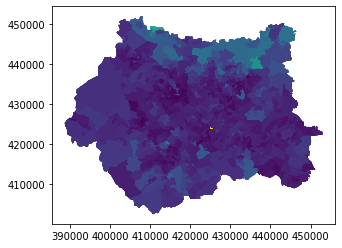

In [29]:
AHAH_house.plot(column='mean_16')

In [30]:
AHAH_house.columns

Index(['lsoa11cd_left', 'geometry', 'CAUTH18NM_left', 'lsoa11nm_left',
       'median_16Q1', 'median_16Q2', 'median_16Q3', 'median_16Q4', 'mean_16',
       'index_right', 'lsoa11cd_right', 'CAUTH18NM_right', 'lsoa11nm_right',
       'r_rank', 'h_rank', 'g_rank', 'e_rank', 'r_exp', 'h_exp', 'g_exp',
       'e_exp', 'ahah', 'r_ahah', 'd_ahah', 'r_dec', 'h_dec', 'g_dec', 'e_dec',
       'gpp_dist', 'ed_dist', 'dent_dist', 'pharm_dist', 'gamb_dist',
       'ffood_dist', 'pubs_dist', 'leis_dist', 'blue_dist', 'off_dist',
       'tobac_dist', 'green_pas', 'green_act', 'ur', 'no2_mean', 'pm10_mean',
       'so2_mean', 'd_gpp_dist', 'd_ed_dist', 'd_pharm_dist', 'd_dent_dist',
       'd_gamb_dist', 'd_ffood_dist', 'd_pubs_dist', 'd_leis_dist',
       'd_blue_dist', 'd_off_dist', 'd_tobac_dist', 'd_green_pas',
       'd_green_act', 'd_no2_mean', 'd_pm10_mean', 'd_so2_mean'],
      dtype='object')

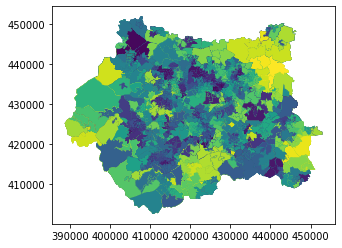

In [31]:
AHAH_house.plot(column='g_rank')

In [32]:
AHAH_house.corr()

,median_16Q1,median_16Q2,median_16Q3,median_16Q4,mean_16,index_right,r_rank,h_rank,g_rank,e_rank,...,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
median_16Q1,1.000000,0.471117,0.706138,0.650138,0.717913,0.109239,-0.207723,0.248981,0.099002,-0.324165,...,-0.079924,0.077592,0.000315,-0.124919,-0.208525,-0.011219,0.167049,-0.293163,-0.148687,-0.389238
median_16Q2,0.471117,1.000000,0.465404,0.442676,0.834647,0.062131,-0.108044,0.131601,0.065769,-0.203885,...,-0.017577,0.020765,0.018016,-0.077206,-0.113048,-0.021921,0.106445,-0.182220,-0.089262,-0.264178
median_16Q3,0.706138,0.465404,1.000000,0.632804,0.813084,0.115078,-0.191332,0.231816,0.116856,-0.293305,...,-0.083040,0.073375,0.026977,-0.087619,-0.212962,-0.014449,0.180938,-0.269754,-0.130902,-0.375141
median_16Q4,0.650138,0.442676,0.632804,1.000000,0.806912,0.080452,-0.185892,0.235629,0.119338,-0.322445,...,-0.073786,0.062951,0.000549,-0.101398,-0.204581,0.020483,0.177968,-0.294321,-0.156364,-0.392570
mean_16,0.717913,0.834647,0.813084,0.806912,1.000000,0.101538,-0.189936,0.233183,0.118741,-0.323895,...,-0.064382,0.060036,0.018893,-0.106773,-0.207004,-0.006505,0.181716,-0.294815,-0.149497,-0.407778
index_right,0.109239,0.062131,0.115078,0.080452,0.101538,1.000000,0.029311,0.049593,0.131064,0.351772,...,0.044735,-0.033212,0.145267,0.064905,0.024958,-0.019354,0.115059,0.299435,0.573617,0.245630
r_rank,-0.207723,-0.108044,-0.191332,-0.185892,-0.189936,0.029311,1.000000,-0.773768,-0.317725,0.420052,...,0.850835,-0.717794,-0.106994,0.720960,0.795333,-0.233688,-0.240248,0.433761,0.247296,0.386452
h_rank,0.248981,0.131601,0.231816,0.235629,0.233183,0.049593,-0.773768,1.000000,0.360204,-0.409676,...,-0.635676,0.690721,0.116427,-0.473037,-0.603906,0.219462,0.308636,-0.439329,-0.204680,-0.428969
g_rank,0.099002,0.065769,0.116856,0.119338,0.118741,0.131064,-0.317725,0.360204,1.000000,-0.111312,...,-0.283909,0.187552,0.572759,-0.244195,-0.250494,0.566637,0.659941,-0.131663,0.042494,-0.161810
e_rank,-0.324165,-0.203885,-0.293305,-0.322445,-0.323895,0.351772,0.420052,-0.409676,-0.111312,1.000000,...,0.304005,-0.303551,0.161011,0.197415,0.390506,-0.194568,-0.163756,0.963737,0.820470,0.906083


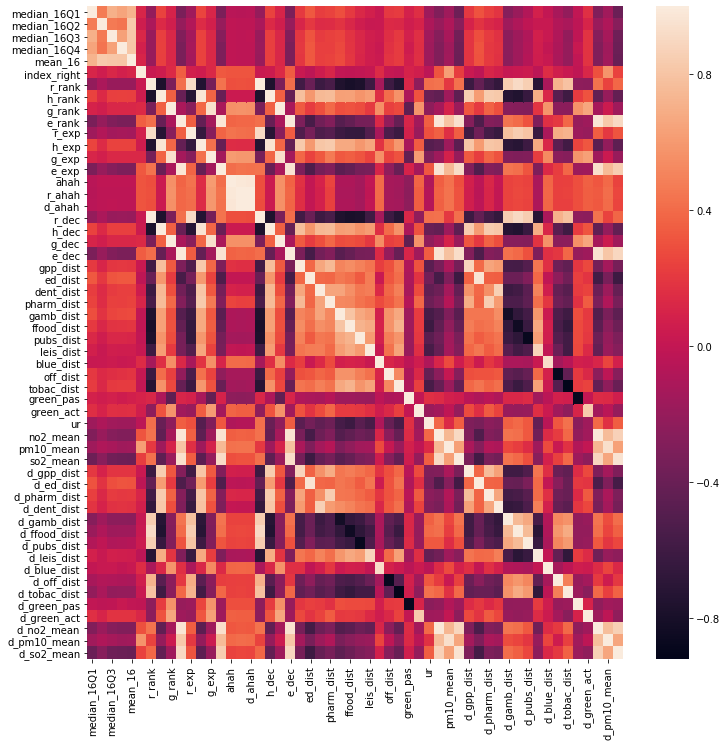

In [33]:
f,ax = plt.subplots(1, figsize=(12,12))
sns.heatmap(AHAH_house.corr());

In [ ]:
AHAH_house['lsoa11nm_left']

In [35]:
AHAH_district = AHAH_house.dissolve(by='lsoa11nm_left', aggfunc='median').reset_index()

Think carefully about how you want to aggregate the columns, we can also assign an aggfunction to each column (as we did with <code>.agg()</code> in day 1 when looking at the bike share data.

E.g.
<code>, aggfunc={'r_rank':'mean','r_exp':'max'})</code>

There is no quick way to assign multiple columns the same function so with a large dataset you might want to consider which columns you include in the aggregated spatial data frame. 


Check size and shape as expected

In [36]:
AHAH_house.loc[AHAH_house['lsoa11nm_left']=='Bradford 001A',['lsoa11nm_left','r_rank','r_exp']]

,lsoa11nm_left,r_rank,r_exp
78,Bradford 001A,11250,7.116094
78,Bradford 001A,13859,9.136380
78,Bradford 001A,5535,3.227517
78,Bradford 001A,5471,3.187488
78,Bradford 001A,4738,2.733925
78,Bradford 001A,27193,23.705142


In [37]:
print('districts:',AHAH_district.shape, 'lsoa:',AHAH_house.shape)

districts: (1388, 56) lsoa: (9512, 61)


In [38]:
AHAH_house['g_rank'].max()

41653

Plot both districts and lsoa to get an idea of the difference in spatial scale

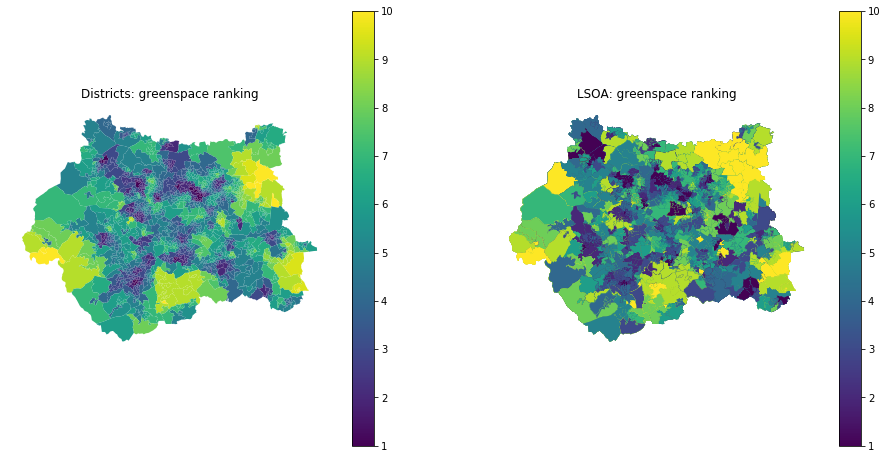

In [39]:
fig,ax = plt.subplots(1,2, figsize=(16,8))

# plot district level data
AHAH_district.plot(column='g_dec',ax=ax[0], legend=True)

# plot lsoa level data
AHAH_house.plot(column='g_dec',ax=ax[1],  legend=True)

# give subplot 1 an informative title
ax[0].set_title('Districts: greenspace ranking')

# give subplot 2 an informative title
ax[1].set_title('LSOA: greenspace ranking')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()

# show figure
plt.show()
